In [494]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,callbacks
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [495]:
train=pd.read_csv("C:/Users/SIMPLON/Desktop/CNN/train.csv")
test= pd.read_csv("C:/Users/SIMPLON/Desktop/CNN/test.csv")

In [496]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [497]:
train['pixel1'].max()

0

In [498]:
train.shape

(42000, 785)

In [499]:
X=train.drop('label',axis=1)
y=train.label
print("X",X.shape)

X (42000, 784)


C:\Users\SIMPLON\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


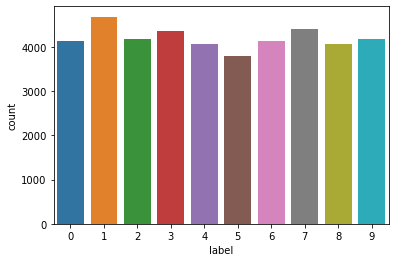

In [500]:
g = sns.countplot(y)


In [501]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3,random_state=2021,stratify=y)

In [502]:
X_train.shape

(29400, 784)

In [503]:
y_val.shape

(12600,)

In [504]:
y_train.value_counts()

1    3279
7    3081
3    3046
9    2932
2    2924
6    2896
0    2892
4    2850
8    2844
5    2656
Name: label, dtype: int64

In [505]:
X_train=X_train.values.reshape(-1,28,28,1)
X_val=X_val.values.reshape(-1,28,28,1)


In [506]:
print("X_train",X_train.shape)
print("X_val",X_val.shape)

X_train (29400, 28, 28, 1)
X_val (12600, 28, 28, 1)


# Normalization

In [517]:
xmax=X_train.max()
X_train=X_train/xmax
X_val=X_val/xmax

In [518]:

model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(Conv2D(100, (3, 3), activation='relu'))                
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [519]:

model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))


model.add(Flatten())
model.add(Dense(100, activation='relu'))                
model.add(Dense(10, activation='softmax'))

In [520]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 8)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 16)        1168      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 6, 6, 16)         

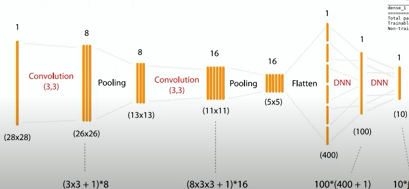


In [521]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [522]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=32,
    verbose=1,  # turn off training log
)

Epoch 1/32
460/460 [==============================] - 15s 31ms/step - loss: 0.4908 - accuracy: 0.8460 - val_loss: 0.1647 - val_accuracy: 0.9528
Epoch 2/32
460/460 [==============================] - 15s 32ms/step - loss: 0.1693 - accuracy: 0.9472 - val_loss: 0.1081 - val_accuracy: 0.9705
Epoch 3/32
460/460 [==============================] - 15s 33ms/step - loss: 0.1201 - accuracy: 0.9622 - val_loss: 0.0905 - val_accuracy: 0.9733
Epoch 4/32
460/460 [==============================] - 14s 30ms/step - loss: 0.1015 - accuracy: 0.9675 - val_loss: 0.0731 - val_accuracy: 0.9790
Epoch 5/32
460/460 [==============================] - 14s 29ms/step - loss: 0.0854 - accuracy: 0.9724 - val_loss: 0.0662 - val_accuracy: 0.9790
Epoch 6/32
460/460 [==============================] - 14s 30ms/step - loss: 0.0741 - accuracy: 0.9756 - val_loss: 0.0633 - val_accuracy: 0.9815
Epoch 7/32
460/460 [==============================] - 14s 30ms/step - loss: 0.0666 - accuracy: 0.9777 - val_loss: 0.0557 - val_accuracy:

In [513]:
score=model.evaluate(X_val,y_val,verbose=0)
print(f'Test loss :{score[0]:4.4f}')
print(f'Test accuracy :{score[0]:4.4f}')

Test loss :0.0521
Test accuracy :0.0521


In [514]:
score=model.evaluate(X_val,y_val,verbose=0)
print(f'Test loss :{score[0]:4.4f}')
print(f'Test accuracy :{score[0]:4.4f}')

Test loss :0.0521
Test accuracy :0.0521


In [515]:
print("accuracy",history_df["accuracy"].max())
print("val accuracy",history_df["val_accuracy"].max())

accuracy 0.9862585067749023
val accuracy 0.9857142567634583


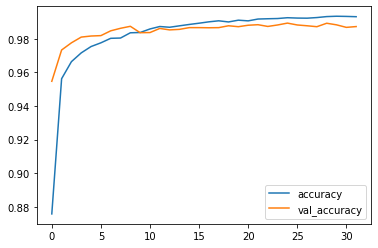

In [516]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy','val_accuracy']].plot();

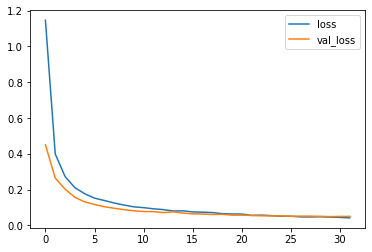

In [466]:
history_df.loc[:, ['loss', 'val_loss']].plot();

In [467]:
y_pred=model.predict(X_val)
y_pred=np.argmax(y_pred,axis=-1)

In [29]:
y_pred

array([5, 6, 8, ..., 6, 5, 8], dtype=int64)

In [30]:
def viz_num(num):
    #Reshape the 768 values to a 28x28 image
    image = X_val.values[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, y_val[num]))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

In [ ]:
#fig,axes = plt.subplots(3,5,figsize=(10,8))
#for i in  range(0,20):
    #viz_num(i)

In [31]:
X_val.shape

(12600, 28, 28, 1)

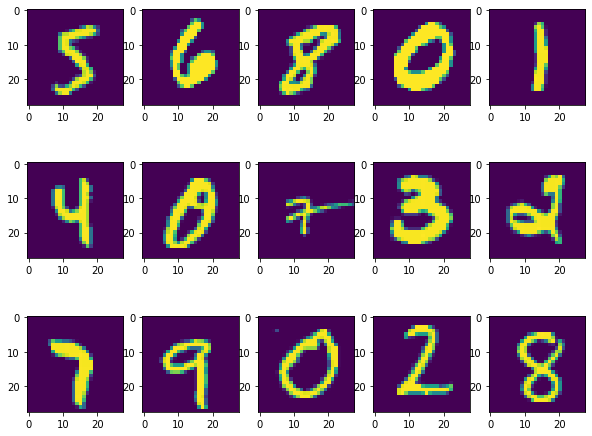

In [468]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_val[i])
  
   

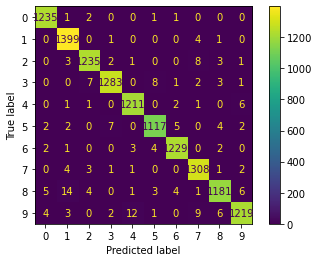

In [469]:
cfm=confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm)
disp.plot() 

In [470]:
# Score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# score
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1240
           1       0.98      1.00      0.99      1405
           2       0.99      0.99      0.99      1253
           3       0.99      0.98      0.99      1305
           4       0.99      0.99      0.99      1222
           5       0.99      0.98      0.98      1139
           6       0.99      0.99      0.99      1241
           7       0.98      0.99      0.99      1320
           8       0.98      0.97      0.98      1219
           9       0.99      0.97      0.98      1256

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



In [34]:
# Score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# score
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1240
           1       0.99      0.99      0.99      1405
           2       0.98      0.99      0.98      1253
           3       0.99      0.98      0.99      1305
           4       0.99      0.97      0.98      1222
           5       0.99      0.98      0.99      1139
           6       0.99      0.99      0.99      1241
           7       0.98      0.98      0.98      1320
           8       0.98      0.98      0.98      1219
           9       0.97      0.98      0.97      1256

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



In [471]:
correct = np.where(y_pred==y_val)[0]
print("totale",len(y_val))
print("Found %d correct labels",len(correct)/len(y_val)*100)

totale 12600
Found %d correct labels 98.54761904761905


In [472]:
import pickle
import streamlit as st
model.save("model.h5")
loaded_model = tf.keras.models.load_model("model.h5")


In [46]:
!pip install -q pyngrok

In [47]:
!pip install -q streamlit

In [48]:
!pip install -q streamlit_ace

In [ ]:
 #prediction = loaded_model.predict(test) 

In [37]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import tensorflow as tf
import streamlit as st
from streamlit_drawable_canvas import st_canvas

In [38]:
#pip install opencv-python

In [39]:
#pip install streamlit-drawable-canvas

In [40]:
# Récupérer les bonnes prédictions (sous forme One hot encoder)
y_pred = model.predict(X_val).round()
# Mettre au bon format pour pouvoir score
y_pred = np.argmax(y_pred,axis=1)
print(y_pred.max())
print(y_pred.min())

9
0


In [474]:
test=test.values.reshape(-1, 28, 28,1)
test=test/xmax

In [42]:
val = model.predict(test)
val[0].sum()


1.0

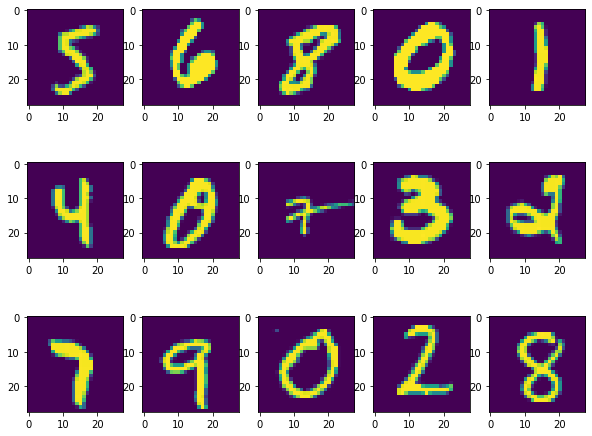

In [44]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_val[i])

2
0
9


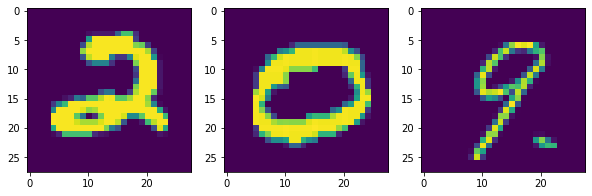

In [475]:
y= model.predict(test)
y_pred = np.argmax(y, axis=-1)
fig,axes = plt.subplots(1,3,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(test[i])
for i in range(0,3):
    print(y_pred[i])

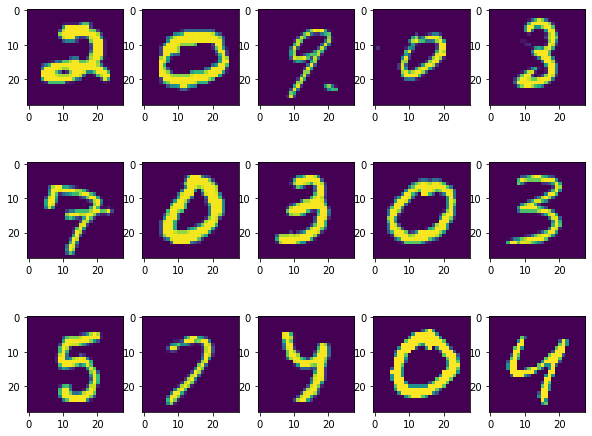

In [476]:
y= model.predict(test)
y_pred = np.argmax(y, axis=-1)
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(test[i])

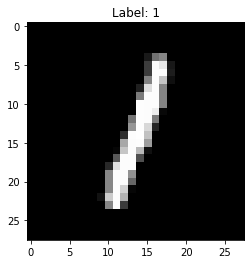

In [477]:
import random
index = random.randrange(1000)
plt.imshow(test[index], cmap='gray')
plt.title('Label: %d' % y_pred[index])
plt.show()

In [478]:
predictions = model.predict(test)
y_pred = np.argmax(predictions, axis=1)

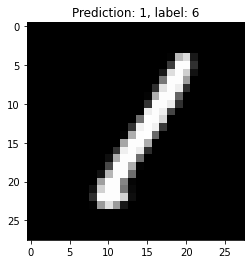

In [480]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (y_pred [index], y_val[index]))
plt.imshow(test[index], cmap='gray')
plt.show()

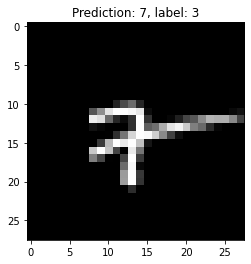

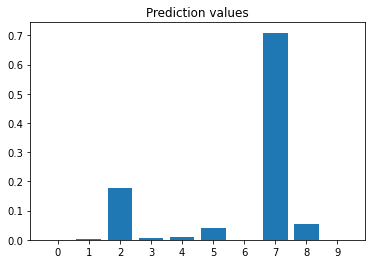

In [306]:
predictions = model.predict(X_val)
y_pred = np.argmax(predictions, axis=1)

for i in range(10):
    index = random.randrange(10)
    if y_pred[index] != y_val[index]:
        break

plt.imshow(X_val[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (y_pred[index], y_val[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))

plt.title('Prediction values')
plt.show()

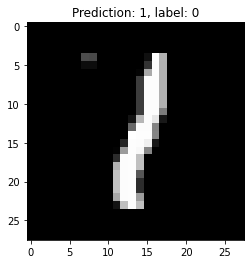

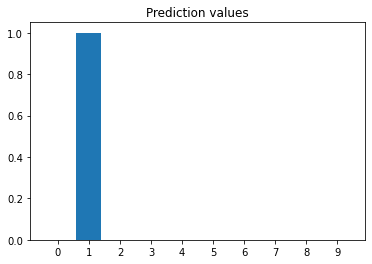

In [489]:
predictions = model.predict(X_val)
y_pred = np.argmax(predictions, axis=1)

for i in range(1000):
    index = random.randrange(10000)
    if y_pred[index] != y_val[index]:
        break

plt.imshow(X_val[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (y_pred[index], y_val[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))

plt.title('Prediction values')
plt.show()

In [433]:
predictions = model.predict(X_val)
y_pred = np.argmax(predictions, axis=1)

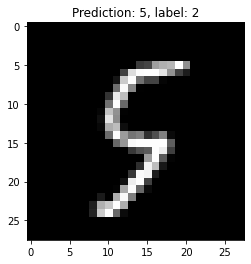

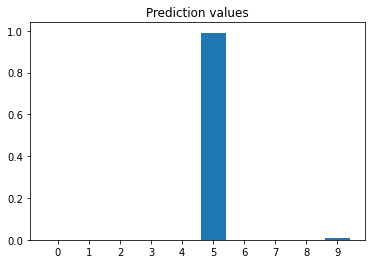

In [372]:


for i in range(1000):
    index = random.randrange(1000)
    if y_pred[index] != y_val[index]:
        break

plt.imshow(X_val[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (y_pred[index], y_val[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))

plt.title('Prediction values')
plt.show()

la probabilté de  0 1.209867e-12
la probabilté de  1 1.8464903e-10
la probabilté de  2 3.872256e-11
la probabilté de  3 1.9296924e-05
la probabilté de  4 1.4261947e-12
la probabilté de  5 0.9999305
la probabilté de  6 8.464845e-13
la probabilté de  7 1.4809308e-11
la probabilté de  8 3.6903868e-05
la probabilté de  9 1.3312572e-05
la valeur prédictée est 5


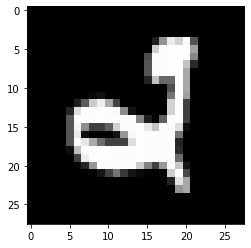

In [492]:
for i in range(0,10):
    b=predictions[0][i]
    print("la probabilté de ",i,b)
    plt.imshow(X_val[i], cmap='gray')
    
    
print("la valeur prédictée est",np.argmax(predictions[0]))
    
